<a href="https://colab.research.google.com/github/HasibAlMuzdadid/Data-Science-Projects/blob/main/sea%20level%20predictor/sea_level_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sea Level Predictor**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [ ]:
# Import Dtaset
df = pd.read_csv("epa-sea-level.csv")
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


In [ ]:
df.shape

(134, 5)

In [ ]:
df.dtypes

Year                          int64
CSIRO Adjusted Sea Level    float64
Lower Error Bound           float64
Upper Error Bound           float64
NOAA Adjusted Sea Level     float64
dtype: object

In [ ]:
# Summary of Dataset
df.describe()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
count,134.000000,134.000000,134.000000,134.000000,21.000000
mean,1946.500000,3.650341,3.204666,4.096016,7.363746
std,38.826537,2.485692,2.663781,2.312581,0.691038
min,1880.000000,-0.440945,-1.346457,0.464567,6.297493
25%,1913.250000,1.632874,1.078740,2.240157,6.848690
50%,1946.500000,3.312992,2.915354,3.710630,7.488353
75%,1979.750000,5.587598,5.329724,5.845472,7.907365
max,2013.000000,9.326772,8.992126,9.661417,8.546648


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      134 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    float64
 3   Upper Error Bound         134 non-null    float64
 4   NOAA Adjusted Sea Level   21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 5.4 KB


By using matplotlib create a scatter plot using the "Year" column as the x-axis and the "CSIRO Adjusted Sea Level" column as the y-axix.

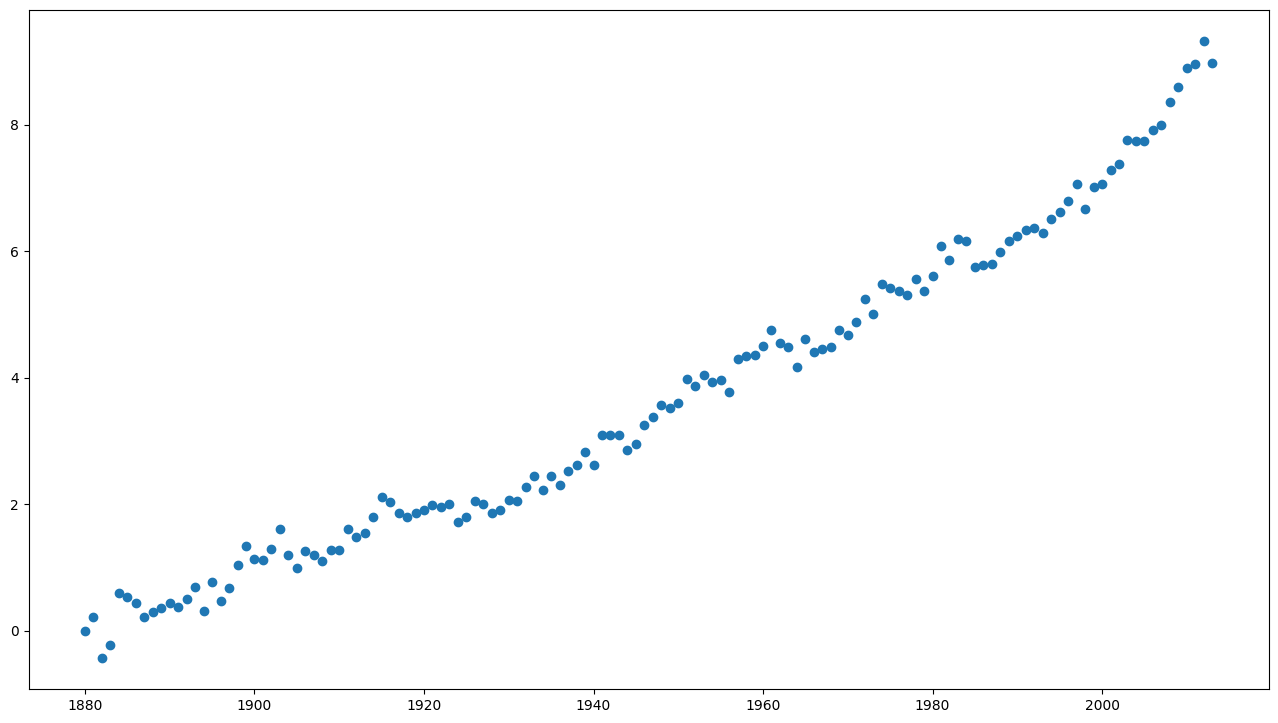

In [ ]:
# Create Scatter Plot
fig, ax = plt.subplots(figsize=(16,9),dpi=100)
plt.scatter(data=df, x="Year", y="CSIRO Adjusted Sea Level")
plt.show()

By using the linregress function from scipy.stats get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.

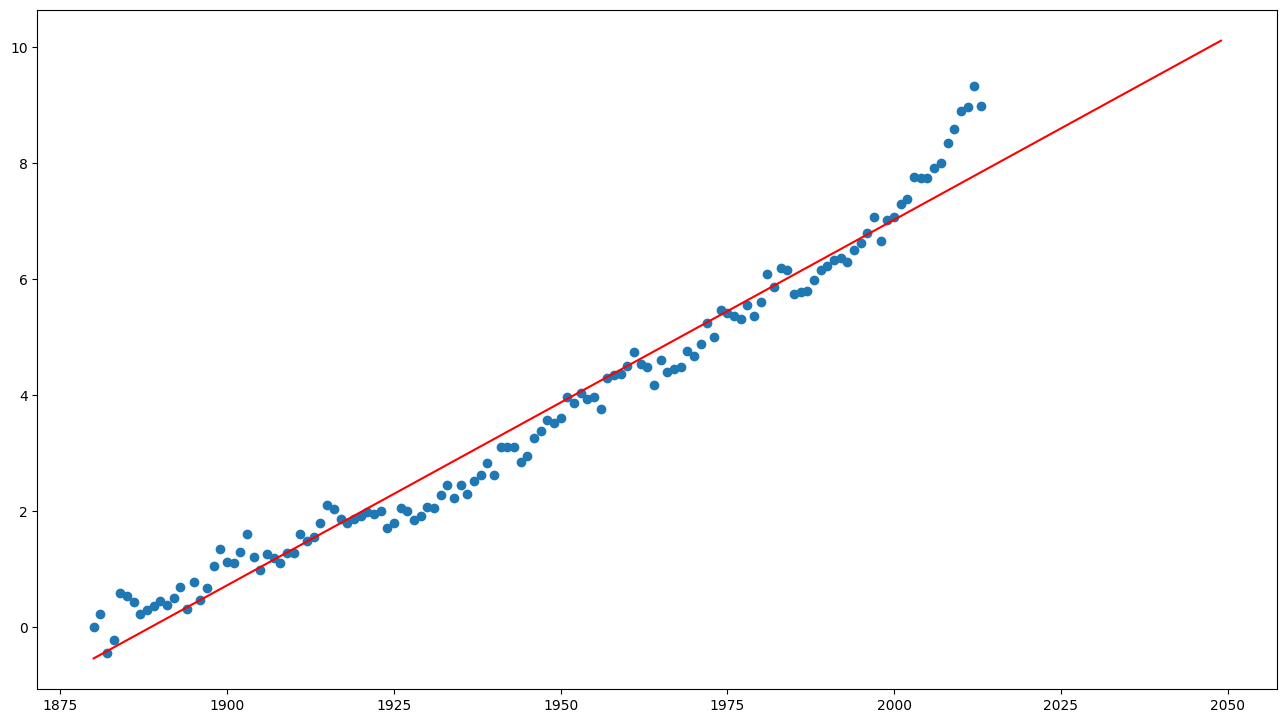

In [ ]:
# Create first line of best fit
fig, ax = plt.subplots(figsize=(16,9),dpi=100)
ax.scatter(data=df, x="Year", y="CSIRO Adjusted Sea Level")

slope, intercept, r_value, p_value, std_err = linregress(df["Year"],df["CSIRO Adjusted Sea Level"])
years = pd.Series(range(1880,2050))
ax.plot(years, intercept+slope*years, "red")
plt.show()

Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.

The x label should be "Year", the y label should be "Sea Level (inches)", and the title should be "Rise in Sea Level".

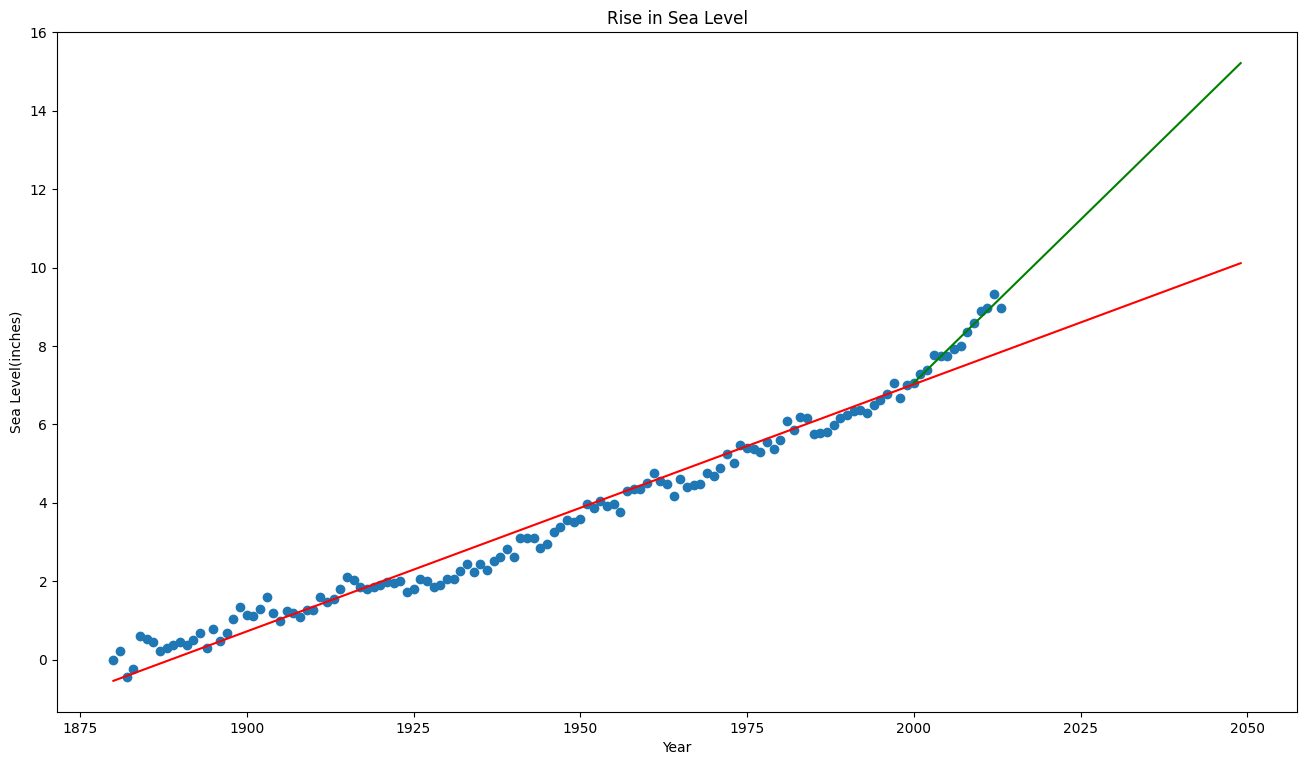

In [ ]:
# Create second line of best fit
fig, ax = plt.subplots(figsize=(16,9),dpi=100)
ax.scatter(data=df, x="Year", y="CSIRO Adjusted Sea Level")

# First line of best fit
slope, intercept, r_value, p_value, std_err = linregress(df["Year"],df["CSIRO Adjusted Sea Level"])
years = pd.Series(range(1880,2050))
ax.plot(years, intercept+slope*years, "red")

# Second line of best fit

#Using the data from year 2000 
df_new = df[df["Year"]>=2000]
slope_new, intercept_new, r_value_new, p_value_new, std_err_new = linregress(df_new["Year"],df_new["CSIRO Adjusted Sea Level"])
years_new = pd.Series(range(2000,2050))
ax.plot(years_new, intercept_new+slope_new*years_new, "green")

#Set labels
ax.set_title("Rise in Sea Level") 
ax.set_xlabel("Year")
ax.set_ylabel("Sea Level(inches)")

plt.show()